### TAKEHOME 3 - PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.style.use("default")

In [2]:
df = pd.read_csv("synthetic_market_returns.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tech_1         600 non-null    float64
 1   Tech_2         600 non-null    float64
 2   Tech_3         600 non-null    float64
 3   Tech_4         600 non-null    float64
 4   Tech_5         600 non-null    float64
 5   Finance_6      600 non-null    float64
 6   Finance_7      600 non-null    float64
 7   Finance_8      600 non-null    float64
 8   Finance_9      600 non-null    float64
 9   Finance_10     600 non-null    float64
 10  Energy_11      600 non-null    float64
 11  Energy_12      600 non-null    float64
 12  Energy_13      600 non-null    float64
 13  Energy_14      600 non-null    float64
 14  Energy_15      600 non-null    float64
 15  Healthcare_16  600 non-null    float64
 16  Healthcare_17  600 non-null    float64
 17  Healthcare_18  600 non-null    float64
 18  Healthcare

if assets were independent, pca would be useless<br>
correlation shows redundancy - multiple assets move together

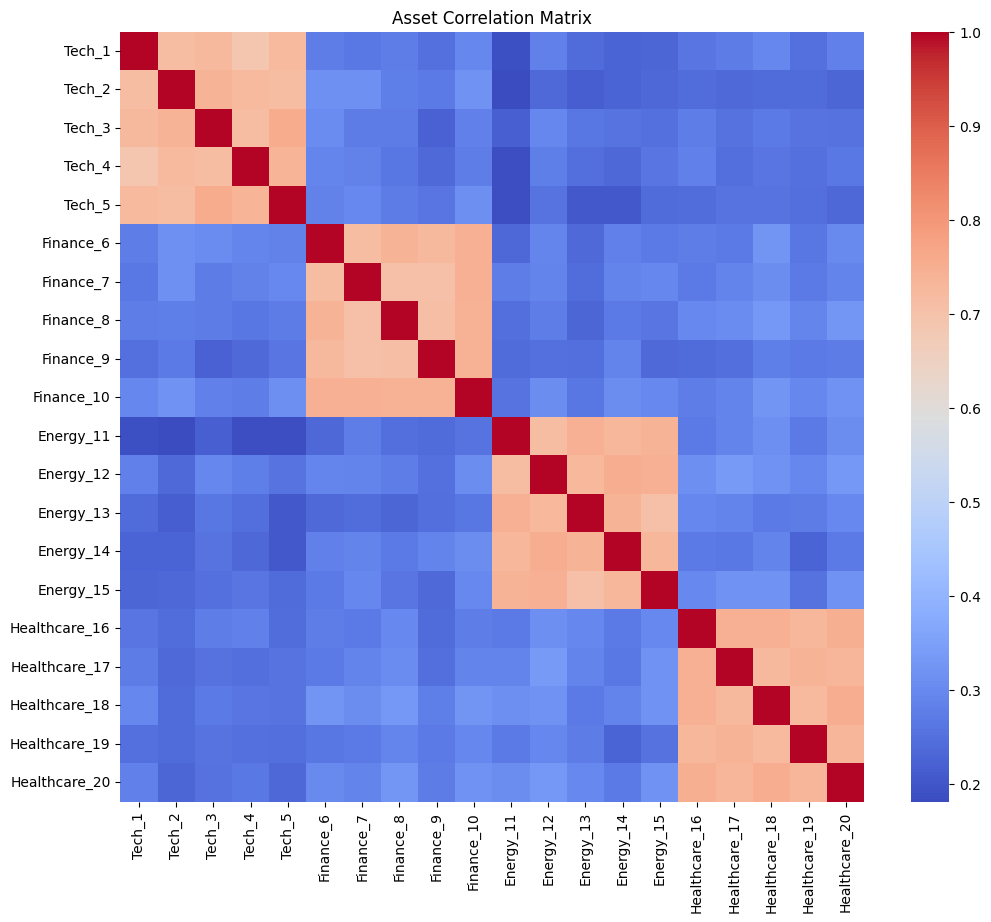

In [3]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Asset Correlation Matrix")
plt.show()

pca finds directions of maximum variance<br>
without standardization, large-variance features dominate<br>
transform to zero mean and unit variance so all features contribute equally

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [5]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

cumulative explained variance shows how much information we retain<br>
tells us intrinsic dimensionality - how many factors actually drive the market

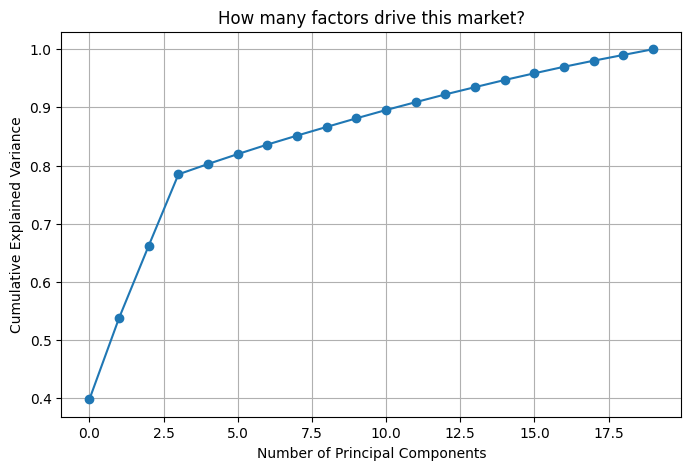

In [6]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("How many factors drive this market?")
plt.grid(True)
plt.show()

scree plot shows variance explained by each PC, elbow = where noise starts

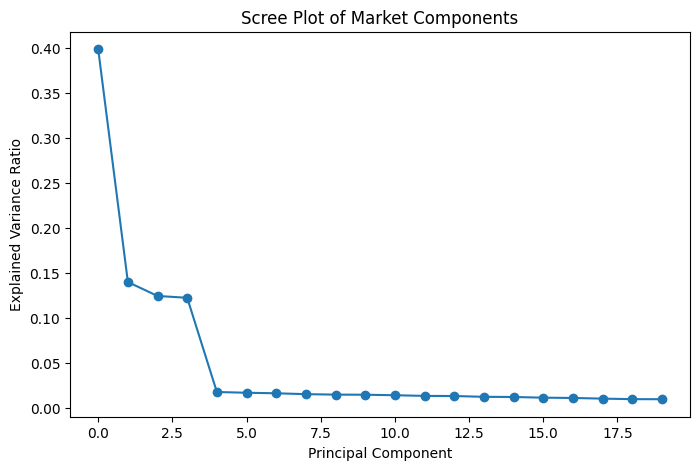

In [7]:
plt.figure(figsize=(8,5))
plt.plot(explained_variance, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot of Market Components")
plt.show()

compress market to 2 latent factors<br>
each day becomes a point in 2D pc space

In [8]:
pca_2 = PCA(n_components=2)
X_2D = pca_2.fit_transform(X_scaled)

print("Explained variance by 2 components:", np.sum(pca_2.explained_variance_ratio_))

Explained variance by 2 components: 0.5381317978980713


alpha = transparency (0 to 1)<br>
s = scatter point size in points^2

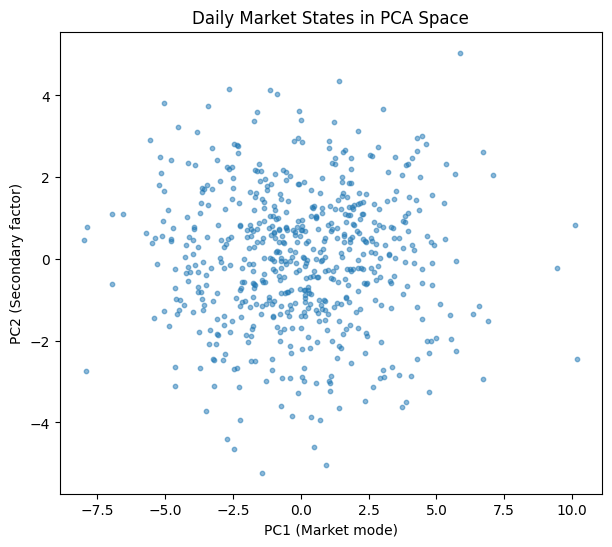

In [9]:
plt.figure(figsize=(7,6))
plt.scatter(X_2D[:,0], X_2D[:,1], alpha=0.5, s=10)
plt.xlabel("PC1 (Market mode)")
plt.ylabel("PC2 (Secondary factor)")
plt.title("Daily Market States in PCA Space")
plt.show()

loadings show how each asset relates to each pc<br>
high positive loading -> asset moves strongly with that factor<br>
high negative loading -> asset moves opposite to that factor

In [10]:
loadings = pd.DataFrame(
    pca_2.components_.T,
    columns=["PC1", "PC2"],
    index=df.columns
)

loadings.head()

,PC1,PC2
Tech_1,0.214298,0.303823
Tech_2,0.211968,0.331337
Tech_3,0.217687,0.305682
Tech_4,0.213678,0.305409
Tech_5,0.212509,0.331053


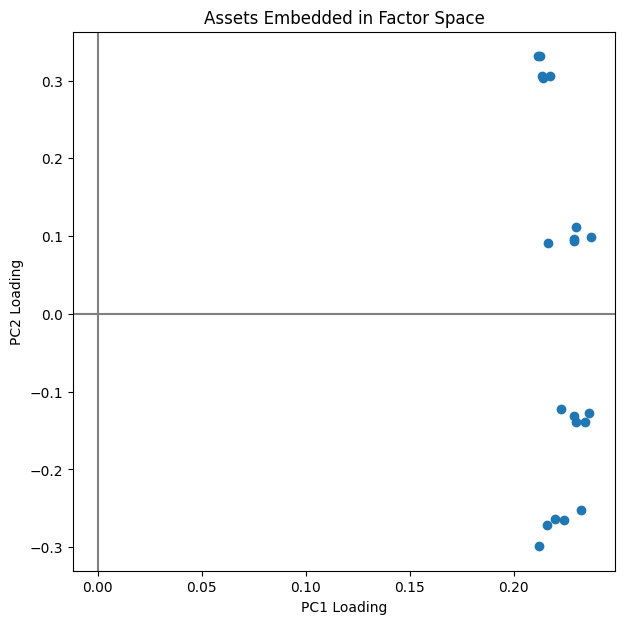

In [11]:
plt.figure(figsize=(7,7))
plt.scatter(loadings["PC1"], loadings["PC2"])
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel("PC1 Loading")
plt.ylabel("PC2 Loading")
plt.title("Assets Embedded in Factor Space")
plt.show()

pca can recover sector clustering without labels<br>
assets from same sector cluster together in pc space

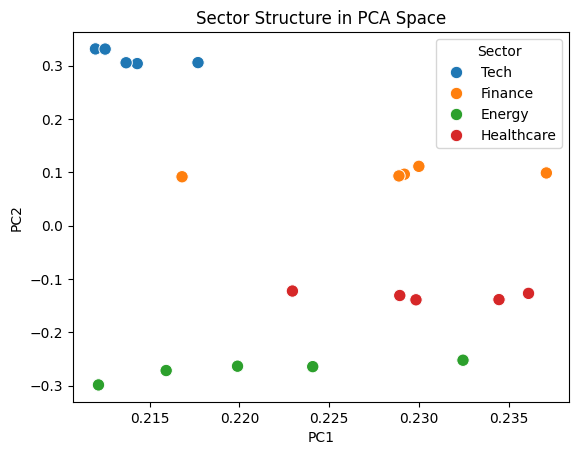

In [12]:
sectors = [name.split("_")[0] for name in loadings.index]
loadings["Sector"] = sectors

sns.scatterplot(data=loadings, x="PC1", y="PC2", hue="Sector", s=80)
plt.title("Sector Structure in PCA Space")
plt.show()

reduce market to k factors then reconstruct<br>
pca as noise filter / compression engine

In [13]:
k = 3
pca_k = PCA(n_components=k)
X_k = pca_k.fit_transform(X_scaled)
X_recon = pca_k.inverse_transform(X_k)

reconstruction_error = np.mean((X_scaled - X_recon)**2)
print("Reconstruction MSE with", k, "components:", reconstruction_error)

Reconstruction MSE with 3 components: 0.3374628546552202


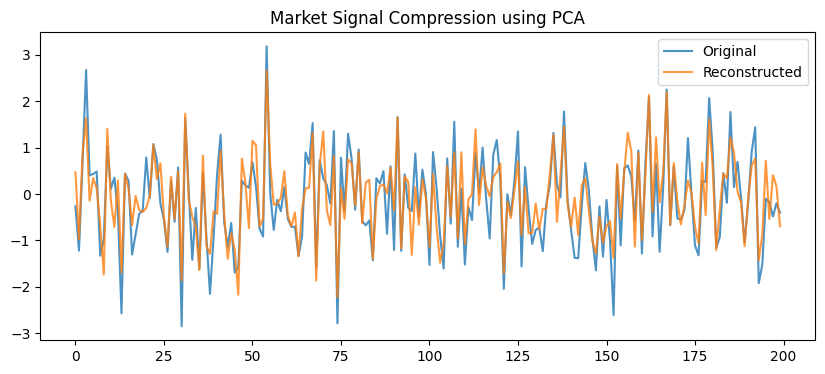

In [14]:
asset = 0

plt.figure(figsize=(10,4))
plt.plot(X_scaled[:200,asset], label="Original", alpha=0.8)
plt.plot(X_recon[:200,asset], label="Reconstructed", alpha=0.8)
plt.legend()
plt.title("Market Signal Compression using PCA")
plt.show()

1) how many components explain most market movement?

from the scree plot and explained variance graph we can see that around 3 elements expliain most of the variance as after 3 the var gain become marginal per pc

2) what does pc1 represent?

pc1 most likely captures the general market factor / how the market is overall since all sectors have positive loading with pc1 , for pc2 tech nd finance have positive loading , energy and healthcare negative showing sectoral contrast

3) can assets be grouped by sector?

assets can be grouped by sector and those clusters will naturally come up in loading space, 

4) how much information is lost?

info lost would be proportional to (1-`explained_variance_ratio`), since only first few PC's are taken most asset-specific data would be lost 